# **EDA of Heart health data**
The motive is to understand the data provided by BRFSS, and the data is taken from https://zenodo.org/records/15364962.\
The columns information as per the zenodo webpage:

1. Demographic factors: sex, age category (14 levels), race, BMI (Body Mass Index)

2. Diseases: weather respondent ever had such diseases as asthma, skin cancer, diabetes, stroke or kidney disease (not including kidney stones, bladder infection or incontinence)

3. Unhealthy habits:

    - Smoking - respondents that smoked at least 100 cigarettes in their entire life (5 packs = 100 cigarettes)
    - Alcohol Drinking - heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)

4. General Health:

    - Difficulty Walking - weather respondent have serious difficulty walking or climbing stairs
    - Physical Activity - adults who reported doing physical activity or exercise during the past 30 days other than their regular job
    - Sleep Time - respondent’s reported average hours of sleep in a 24-hour period
    - Physical Health - number of days being physically ill or injured (0-30 days)
    - Mental Health - number of days having bad mental health (0-30 days)
    - General Health - respondents declared their health as ’Excellent’, ’Very good’, ’Good’ ,’Fair’ or ’Poor’

----

## **The content of this EDA:**
- Exploring the overall data
    - Number of Columns
    - Null or duplicate values
    - Types of columns
        - categorical columns
        - numerical columns
        - target column

- Categorical Columns
    - segregating further
        - Binary
        - Singleton
        - multilabel (<=20 classes)
        - multilabel (>20 classes)
    - distribution of values using pie/bar chart

- Numerical columns
    - segregating further
        - continuous
        - discrete
    - looking for outliers in discrete values
    - understanding the distribution on continuous values

- understanding realtionships between columns (if any)
----

## Exploring the overall data

In [25]:
# importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
# load the data

df = pd.read_csv("../raw_data/heart_2020_cleaned.csv")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


### Number of columns and their data types

In [27]:
n_col = len(df.columns)
print(f"There are {n_col} columns in the data set.\n")
print(df.info())

There are 18 columns in the data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-

### Looking for Null values or duplication

In [28]:
null = 0

for col in df.columns:
    if(df[col].isnull().sum() > 0):
        null += 1
        print(f"- \"{col}\" has {df[col].isnull().sum()} values.")

if(null == 0):
    print("- The Data set has no null values in it.")

if(df.duplicated().sum() > 0):
    pct = (df.duplicated().sum()/len(df))*100.0
    print(f"- There are {df.duplicated().sum()} duplications in this data set. With {pct:.2f}% of duplication.")
else:
    print("- No duplication found")
    

- The Data set has no null values in it.
- There are 18078 duplications in this data set. With 5.65% of duplication.


### Observation
- There are no **null** values
- There is a huge duplication that needs to be taken care of.

### Splitting categorical and numerical columns

In [29]:
cat_col = []
num_col = []
target = "HeartDisease"

for col in df.columns:
    if(col == target):
        continue    # this is target variable
    if(df[col].dtype == 'object'):
        cat_col.append(col)
    else:
        num_col.append(col)

print("Categorical columns:\n")
for col in cat_col:
    print(f"- {col}")

print("\n------------")
print("Numerical columns:\n")
for col in num_col:
    print(f"- {col}")

Categorical columns:

- Smoking
- AlcoholDrinking
- Stroke
- DiffWalking
- Sex
- AgeCategory
- Race
- Diabetic
- PhysicalActivity
- GenHealth
- Asthma
- KidneyDisease
- SkinCancer

------------
Numerical columns:

- BMI
- PhysicalHealth
- MentalHealth
- SleepTime


### Observation:
Categorical vairables are more than numerical ones

### Looking into **Categorical columns**

### Splitting further

In [30]:
binary = []
singleton = []
countable = []
huge = []

for col in cat_col:
    n_uniq = df[col].value_counts().count()
    print(f"- \"{col}\" has {n_uniq} unique features.")
    if(n_uniq == 1):
        singleton.append(col)
    elif(n_uniq == 2):
        binary.append(col)
    elif(n_uniq <= 20):
        countable.append(col)
    else:
        huge.append(col)

- "Smoking" has 2 unique features.
- "AlcoholDrinking" has 2 unique features.
- "Stroke" has 2 unique features.
- "DiffWalking" has 2 unique features.
- "Sex" has 2 unique features.
- "AgeCategory" has 13 unique features.
- "Race" has 6 unique features.
- "Diabetic" has 4 unique features.
- "PhysicalActivity" has 2 unique features.
- "GenHealth" has 5 unique features.
- "Asthma" has 2 unique features.
- "KidneyDisease" has 2 unique features.
- "SkinCancer" has 2 unique features.


### Observation
- Most features are binary

### Distribution of non binary/countable variables

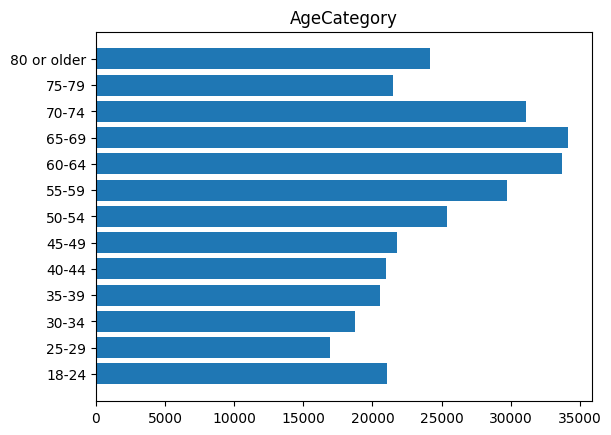

---------

80 or older    24153
75-79          21482
70-74          31065
65-69          34151
60-64          33686
55-59          29757
50-54          25382
45-49          21791
40-44          21006
35-39          20550
30-34          18753
25-29          16955
18-24          21064
Name: AgeCategory, dtype: int64
---------



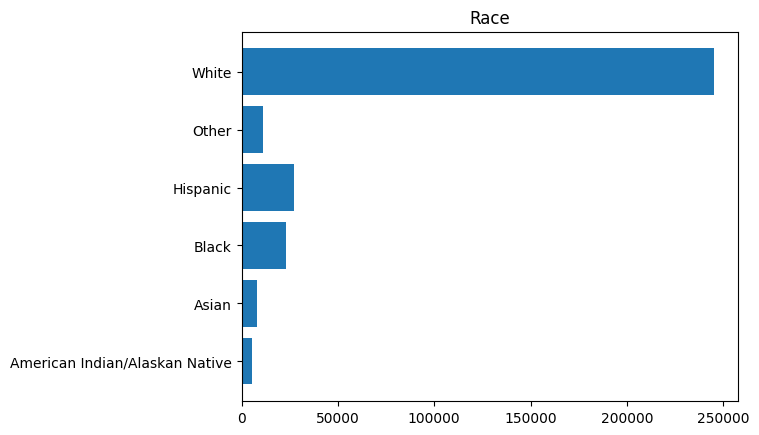

---------

White                             245212
Other                              10928
Hispanic                           27446
Black                              22939
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64
---------



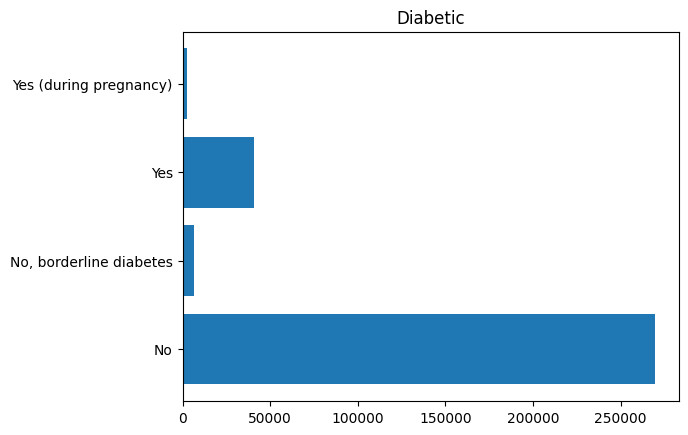

---------

Yes (during pregnancy)       2559
Yes                         40802
No, borderline diabetes      6781
No                         269653
Name: Diabetic, dtype: int64
---------



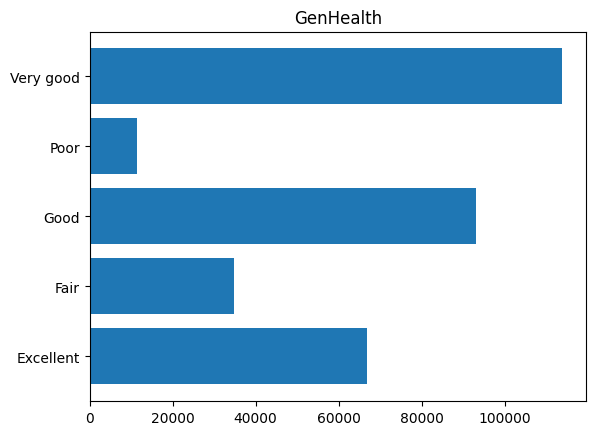

---------

Very good    113858
Poor          11289
Good          93129
Fair          34677
Excellent     66842
Name: GenHealth, dtype: int64
---------



In [45]:
for col in countable:
    plt.barh(df[col].value_counts().sort_index().index, df[col].value_counts().sort_index().values)
    plt.title(col)
    plt.show()
    print("---------\n")
    print(df[col].value_counts().sort_index(ascending=False))
    print("---------\n")

### Observation:
- Age category seems balanced with every group almost equally being there
- People from white race are more in this data set
- A very large amount of people are non diabetic
- A few of number of people are rating their health as poor, rest is kind of balanced with "very good" as majority

### Distribution of binary variables

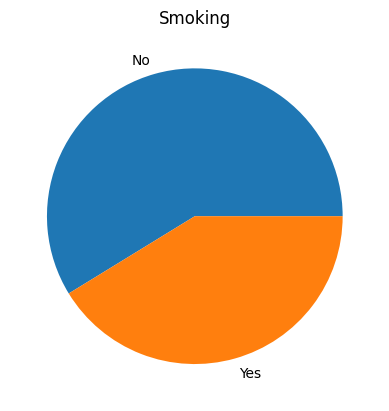

---------

Yes    131908
No     187887
Name: Smoking, dtype: int64
---------



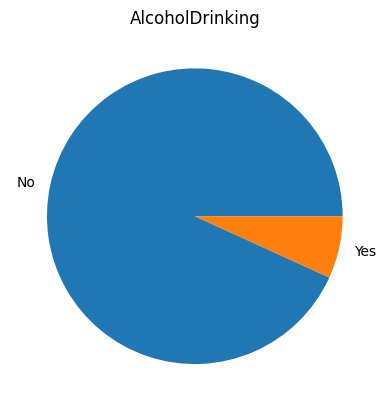

---------

Yes     21777
No     298018
Name: AlcoholDrinking, dtype: int64
---------



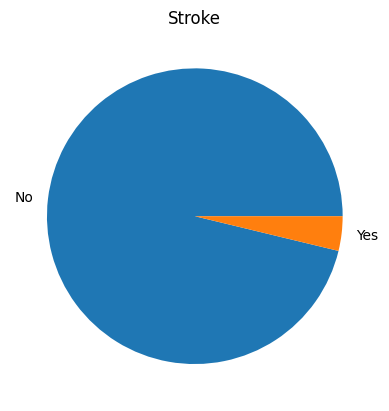

---------

Yes     12069
No     307726
Name: Stroke, dtype: int64
---------



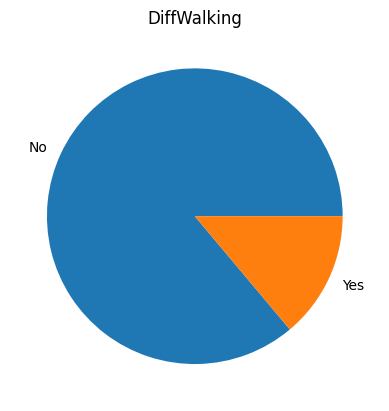

---------

Yes     44410
No     275385
Name: DiffWalking, dtype: int64
---------



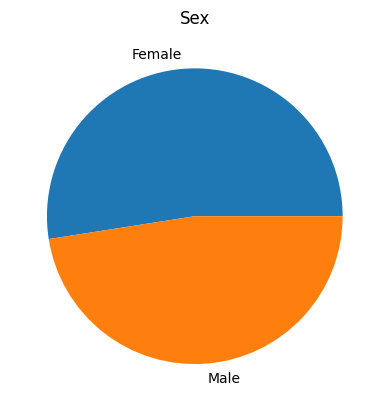

---------

Male      151990
Female    167805
Name: Sex, dtype: int64
---------



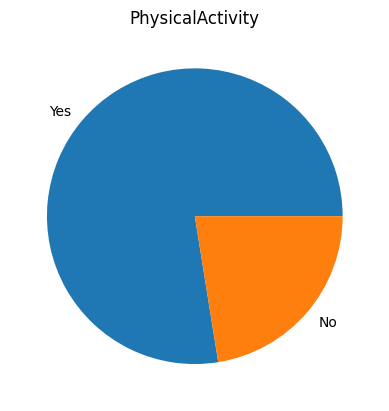

---------

Yes    247957
No      71838
Name: PhysicalActivity, dtype: int64
---------



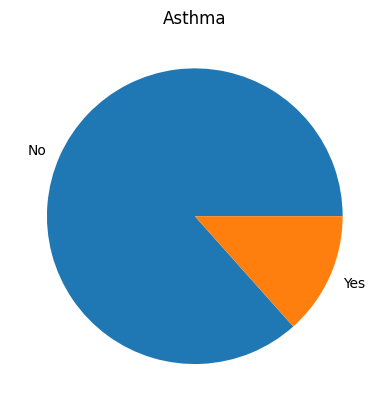

---------

Yes     42872
No     276923
Name: Asthma, dtype: int64
---------



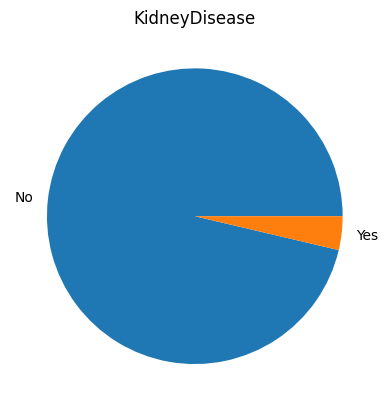

---------

Yes     11779
No     308016
Name: KidneyDisease, dtype: int64
---------



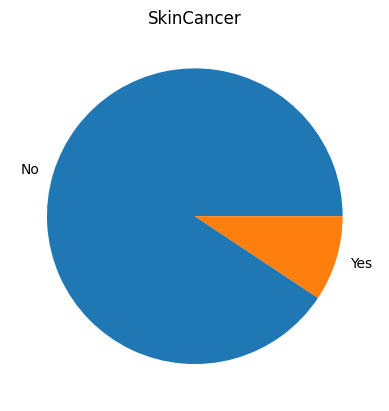

---------

Yes     29819
No     289976
Name: SkinCancer, dtype: int64
---------



In [46]:
for col in binary:
    plt.pie(df[col].value_counts().values, labels=df[col].value_counts().index)
    plt.title(col)
    plt.show()
    print("---------\n")
    print(df[col].value_counts().sort_index(ascending=False))
    print("---------\n")

### Observations
- "sex" and "smoking" values are nearly balanced.
- A large amount of people don't report any conditions like Skin cancer, stroke, kindey disease, asthma, lack of physical activity, alchohol drinking or difficulty of walking.

## Looking into **Numerical variables**

Information of "BMI": 

   index            BMI
0  count  319795.000000
1   mean      28.325399
2    std       6.356100
3    min      12.020000
4    25%      24.030000
5    50%      27.340000
6    75%      31.420000
7    max      94.850000

-----------

Information of "PhysicalHealth": 

   index  PhysicalHealth
0  count    319795.00000
1   mean         3.37171
2    std         7.95085
3    min         0.00000
4    25%         0.00000
5    50%         0.00000
6    75%         2.00000
7    max        30.00000

-----------

Information of "MentalHealth": 

   index   MentalHealth
0  count  319795.000000
1   mean       3.898366
2    std       7.955235
3    min       0.000000
4    25%       0.000000
5    50%       0.000000
6    75%       3.000000
7    max      30.000000

-----------

Information of "SleepTime": 

   index      SleepTime
0  count  319795.000000
1   mean       7.097075
2    std       1.436007
3    min       1.000000
4    25%       6.000000
5    50%       7.000000
6    75%   

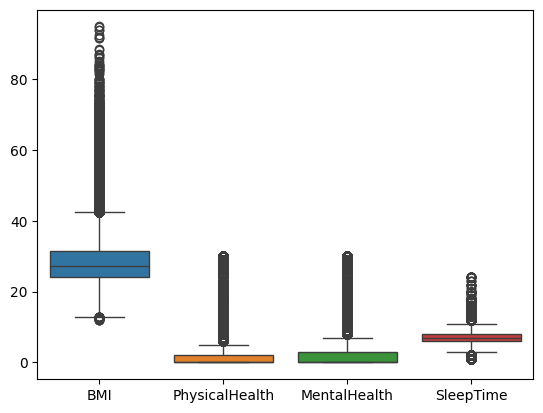

In [83]:
for col in num_col:
    print(f"Information of \"{col}\": \n")
    print(df[col].describe().reset_index())
    print("\n-----------\n")

sns.boxplot(df[num_col])
plt.show()

### observations
- BMI distribution shows that most people are overweight and extreme obesity cases are also there.
- Sleeptime has fair disritbution but higher extremes are there.
- Physical and mental health shows similar trend which can be a sign of correlation. Both distriubtion shows that most people had lesser bad days but people with more days are there.
- There are many outliers which show that the there are many extreme cases in the data.

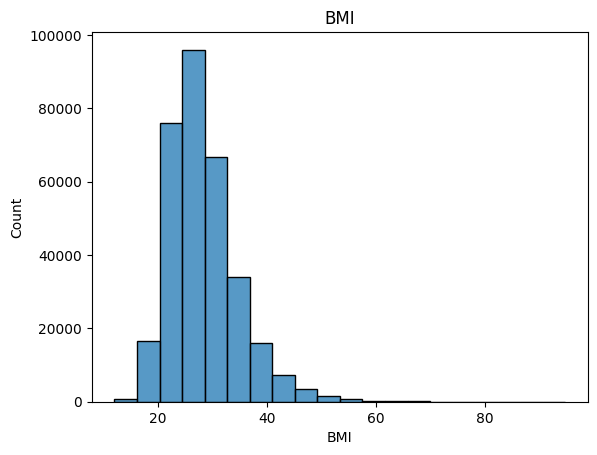

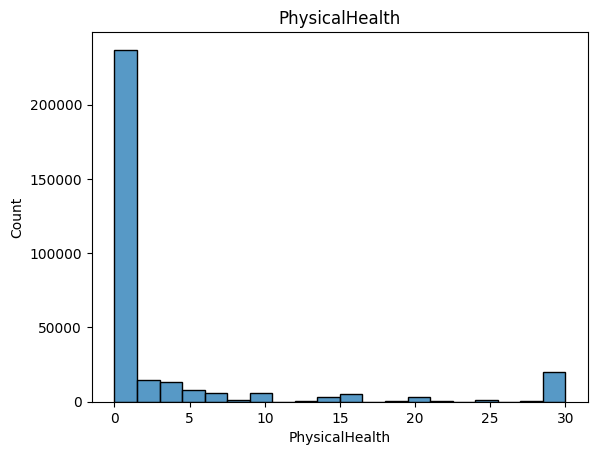

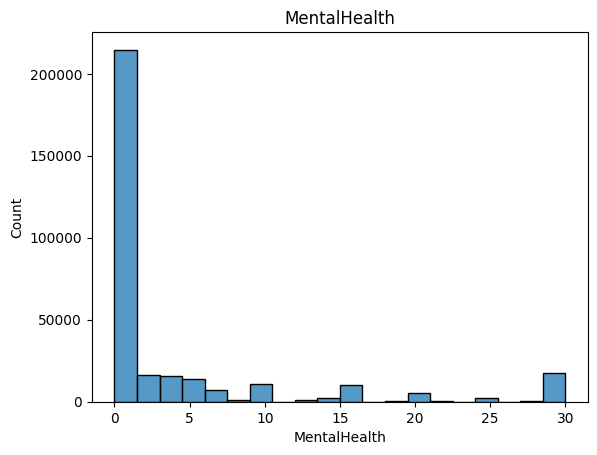

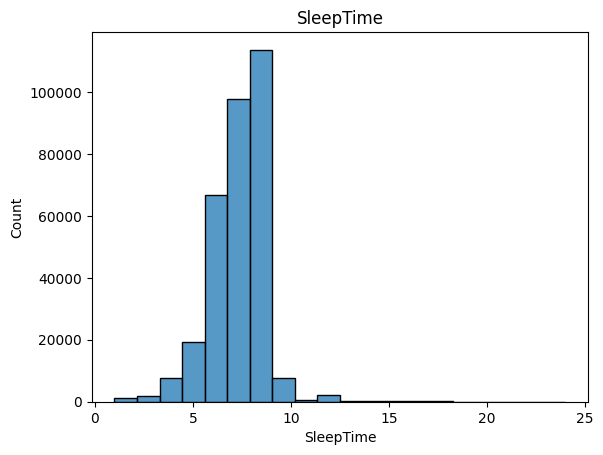

In [70]:
for col in num_col:
    sns.histplot(df[col], bins=20)
    plt.title(col)
    plt.show()

### Observation
- BMI shows a slighlty left skewed with mostly ranging between 20 to 40
- Sleep time is also showing normal distribution with mostly ranging in 5 to 10
- Both physical and mental health are left skewed and it is likely for them to have a relationship.

## Checking for relationships among columns

C:\Users\91977\AppData\Local\Temp\ipykernel_12684\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

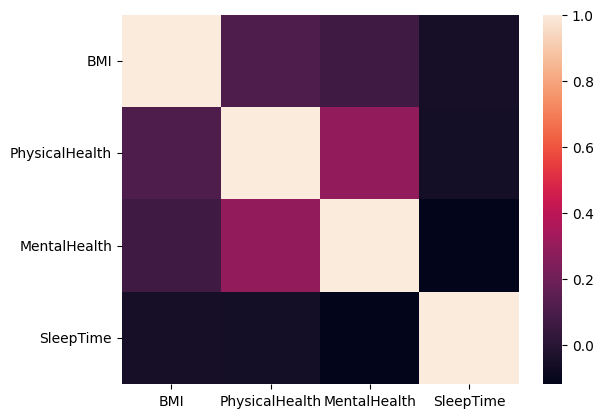

In [59]:
sns.heatmap(df.corr())

#### Physical and mental health are slightly positively correlated

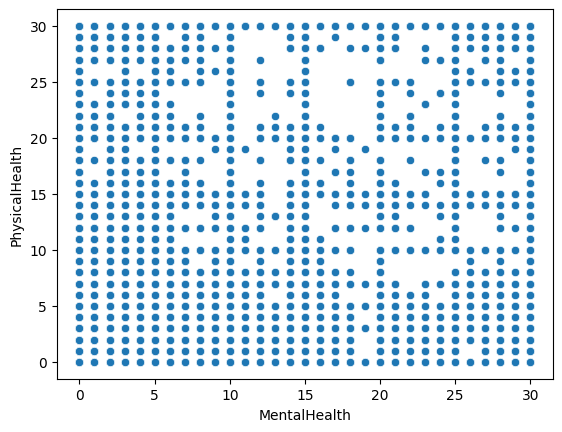

                MentalHealth  PhysicalHealth
MentalHealth        1.000000        0.287987
PhysicalHealth      0.287987        1.000000


In [76]:
sns.scatterplot(x=df['MentalHealth'], y=df['PhysicalHealth'])
plt.show()
print(df[['MentalHealth', 'PhysicalHealth']].corr())

## Observation
- Numeric data aren't corelated to each other to a very good extend.
- Physical and menatal health were expected to have a good correlation being similar in distribution but the corelation is not that straightforward.

## Relationship for target and numerical values

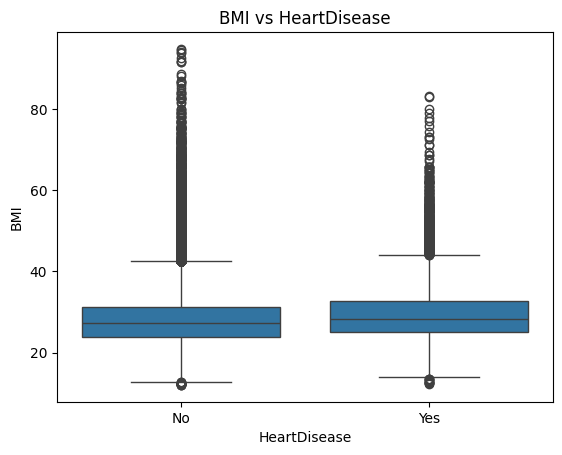

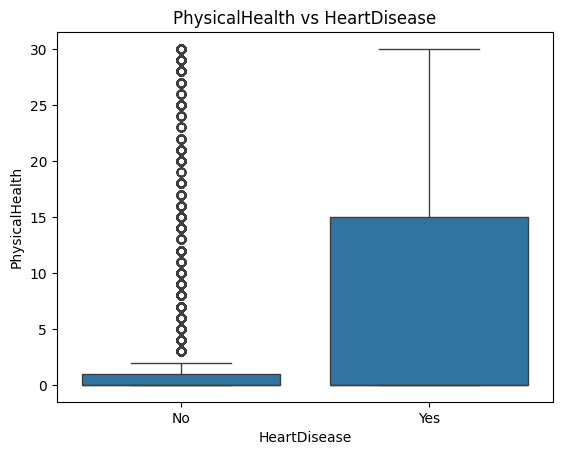

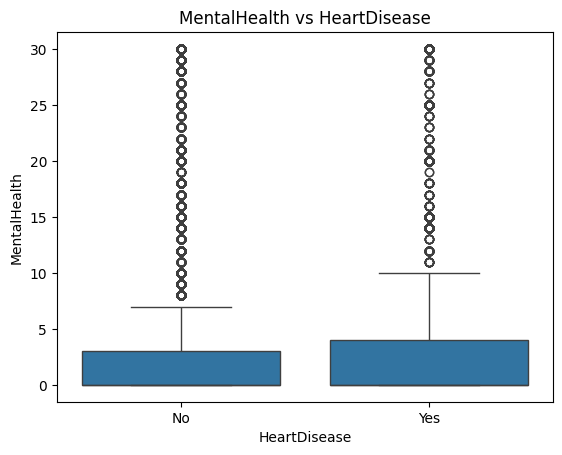

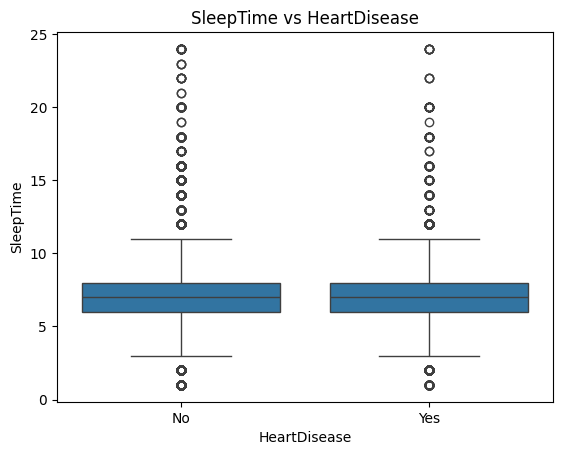

In [167]:
for col in num_col:
    sns.boxplot(
        x='HeartDisease',
        y=col,
        data=df
    )
    plt.title(f"{col} vs HeartDisease")
    plt.show()


# Observation
Among people having heart diesease, the physical health has a lot of variation.

## Relationship for target and numerical values

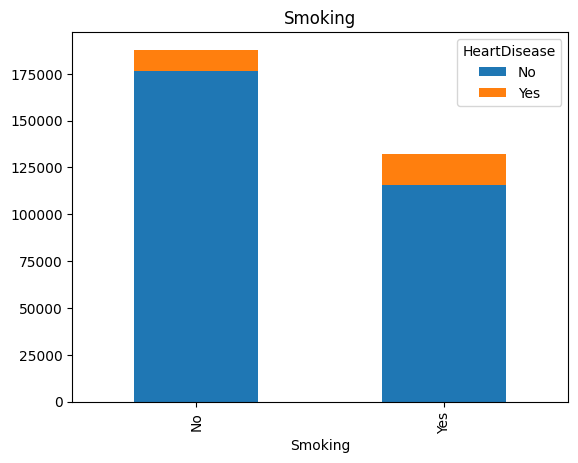

"No" has 6.03% Heart disease cases
"Yes" has 12.16% Heart disease cases


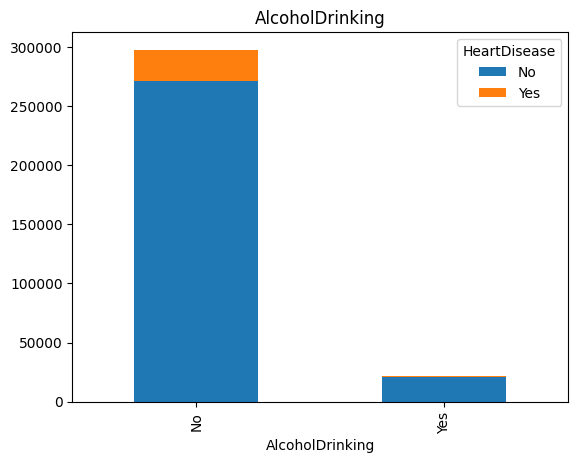

"No" has 8.80% Heart disease cases
"Yes" has 5.24% Heart disease cases


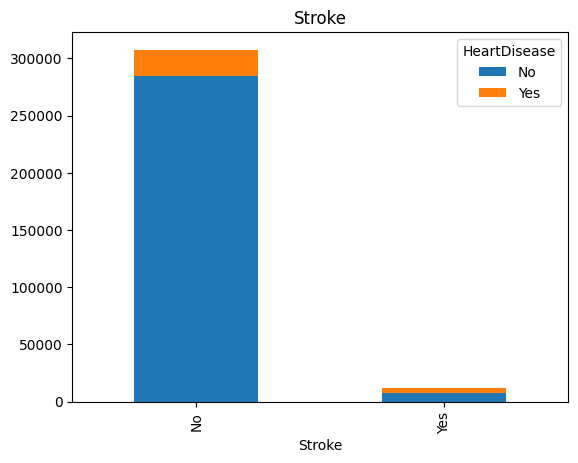

"No" has 7.47% Heart disease cases
"Yes" has 36.37% Heart disease cases


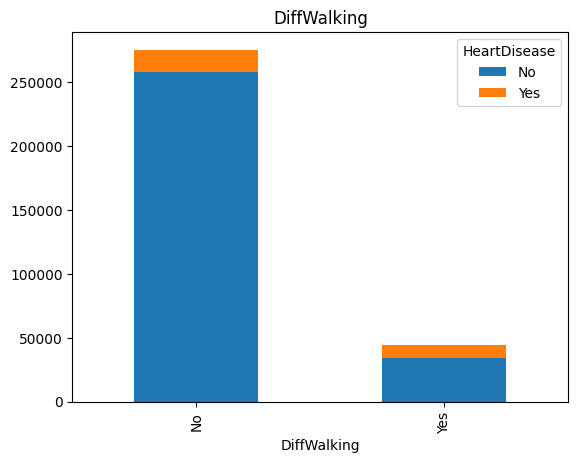

"No" has 6.30% Heart disease cases
"Yes" has 22.58% Heart disease cases


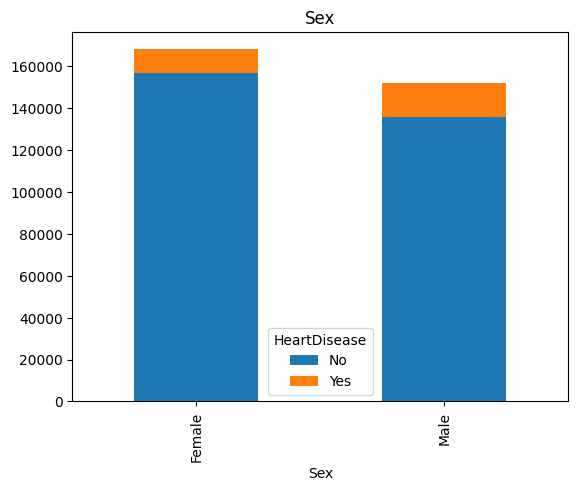

"Female" has 6.69% Heart disease cases
"Male" has 10.62% Heart disease cases


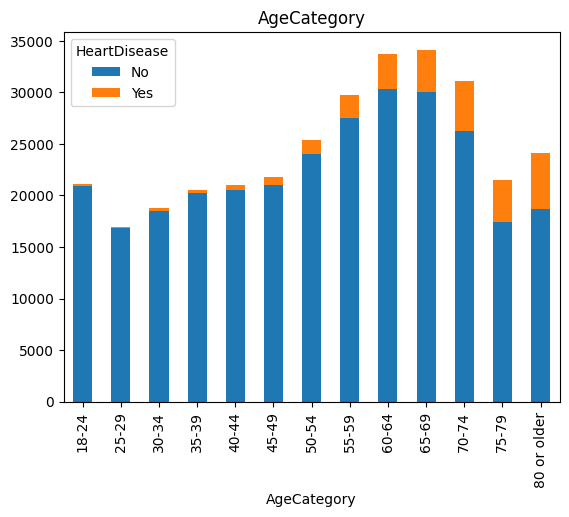

"18-24" has 0.62% Heart disease cases
"25-29" has 0.78% Heart disease cases
"30-34" has 1.21% Heart disease cases
"35-39" has 1.44% Heart disease cases
"40-44" has 2.31% Heart disease cases
"45-49" has 3.41% Heart disease cases
"50-54" has 5.45% Heart disease cases
"55-59" has 7.40% Heart disease cases
"60-64" has 9.88% Heart disease cases
"65-69" has 12.01% Heart disease cases
"70-74" has 15.60% Heart disease cases
"75-79" has 18.85% Heart disease cases
"80 or older" has 22.56% Heart disease cases


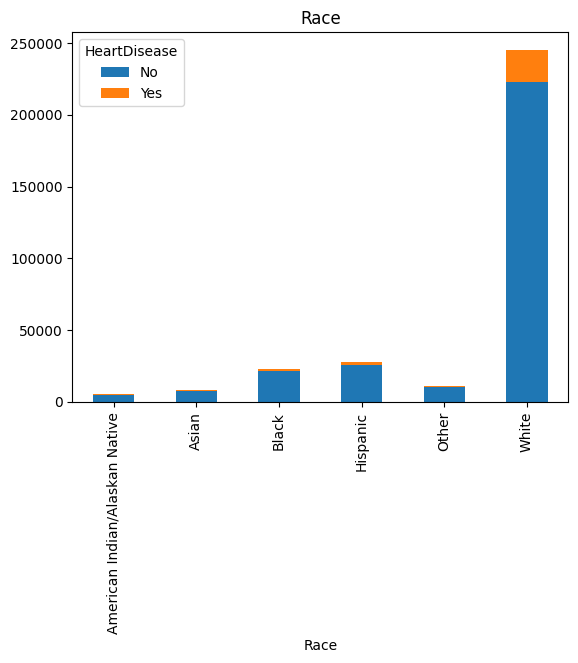

"American Indian/Alaskan Native" has 10.42% Heart disease cases
"Asian" has 3.30% Heart disease cases
"Black" has 7.54% Heart disease cases
"Hispanic" has 5.26% Heart disease cases
"Other" has 8.11% Heart disease cases
"White" has 9.18% Heart disease cases


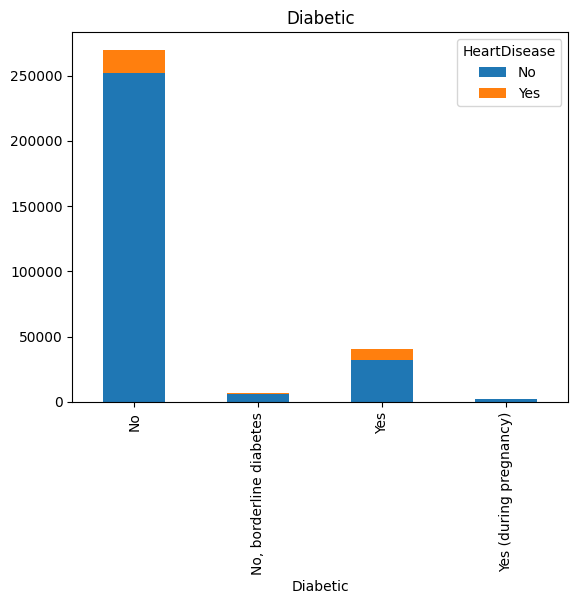

"No" has 6.50% Heart disease cases
"No, borderline diabetes" has 11.64% Heart disease cases
"Yes" has 21.95% Heart disease cases
"Yes (during pregnancy)" has 4.22% Heart disease cases


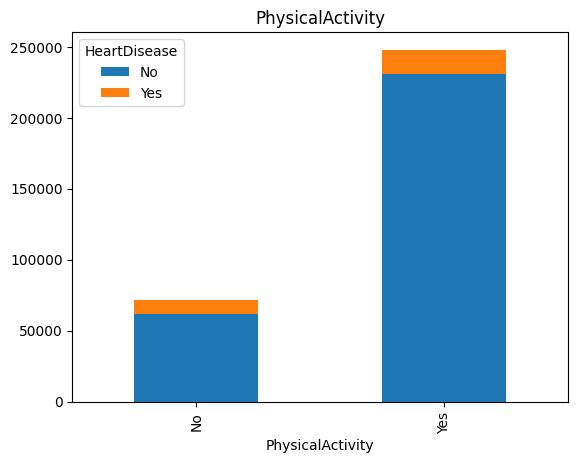

"No" has 13.76% Heart disease cases
"Yes" has 7.05% Heart disease cases


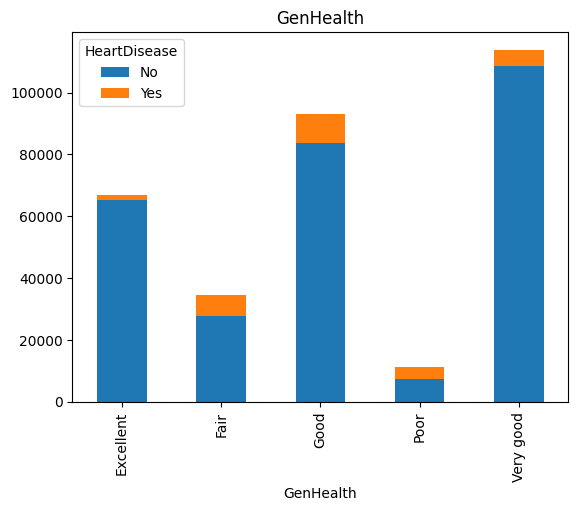

"Excellent" has 2.24% Heart disease cases
"Fair" has 20.43% Heart disease cases
"Good" has 10.26% Heart disease cases
"Poor" has 34.10% Heart disease cases
"Very good" has 4.73% Heart disease cases


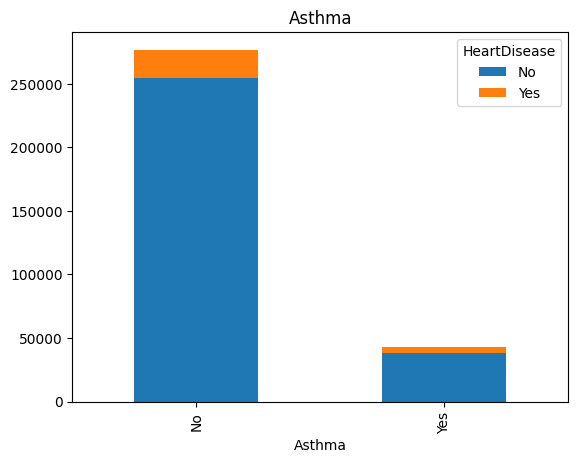

"No" has 8.10% Heart disease cases
"Yes" has 11.51% Heart disease cases


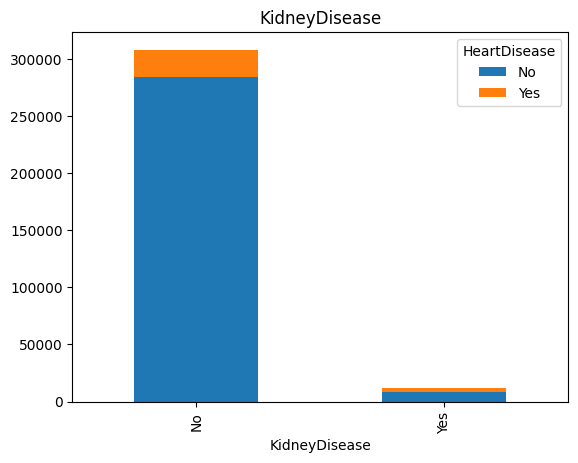

"No" has 7.77% Heart disease cases
"Yes" has 29.33% Heart disease cases


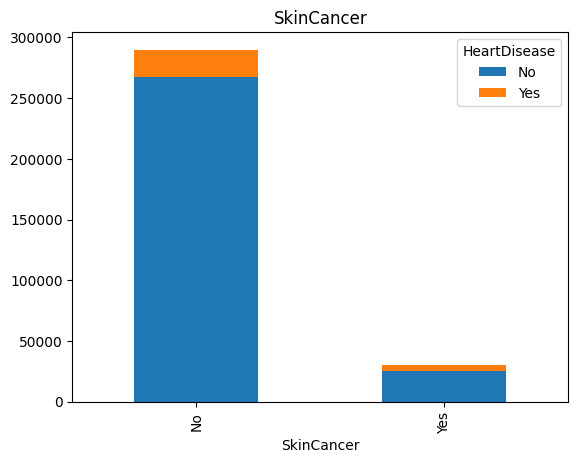

"No" has 7.72% Heart disease cases
"Yes" has 16.70% Heart disease cases


In [163]:
for col in cat_col:
    ct = pd.crosstab(df[col], df['HeartDisease'])
    ct.plot(kind='bar', stacked=True)
    plt.title(col)
    plt.show()
    for i in range(len(ct)):
        print(f"\"{df[col].value_counts().sort_index().index[i]}\" has {ct['Yes'][i]/(ct['No'][i] + ct['Yes'][i]) * 100:.2f}% Heart disease cases")